<font size="5">__Stock Market Trend Prediction__</font>

<img src='StockMarket.jpg' width=800 height=600/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Tesla_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
#pd.DataFrame(training_set)

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [5]:
len(training_set)

1258

### Creating a data structure with 60 timesteps and 1 output

In [6]:
TimeGroup=60
LengthofData= len(training_set)
X_train = []
y_train = []
for i in range(TimeGroup, LengthofData):
    X_train.append(training_set_scaled[i-TimeGroup:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train =np.array(X_train)
y_train =np.array(y_train)

### Reshaping
<font size="4"> The structure which expected by RNN is always is  (# of rows, # of columns, # of indicators). Here, we have only one indicator, which is Stock Price; you may have examples with more than 1 indicators, for example the Stock price, and the number of exchanges, etc. <br>
<font color='blue'> #X_train.shape[0] or len(X_train[:,0]) # gives you the number of rows<br>
<font color='blue'> #X_train.shape[1] or len(X_train[0,:]) # gives you the number of columns<br>

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [9]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [14]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [16]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 10s 80ms/step - loss: 0.0423
Epoch 2/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0057
Epoch 3/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0061
Epoch 5/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0062
Epoch 7/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0055
Epoch 8/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0051
Epoch 10/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0042
Epoch 13/100
38/38 [====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [17]:
dataset_test = pd.read_csv('Tesla_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [18]:
len(real_stock_price)

20

### Getting the predicted stock price of 2017

In [19]:
dataset_total = pd.concat((dataset_train['Price'], dataset_test['Price']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values    # recall, we chose TimeGroup=60
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):  # 80=60+ the length of the dqta which we want to predict "len(real_stock_price)"
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


### Visualising the results

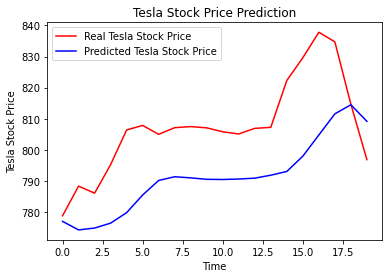

In [20]:
plt.plot(real_stock_price, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

##### End